In [54]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [12]:
Date_type = ["shipping_limit_date","order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", 
             "order_delivered_customer_date", "order_estimated_delivery_date"]
olist_cleaned = pd.read_csv('olist.csv', parse_dates= Date_type)
olist_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115878 non-null  object        
 1   order_item_id                  115878 non-null  int64         
 2   product_id                     115878 non-null  object        
 3   seller_id                      115878 non-null  object        
 4   shipping_limit_date            115878 non-null  datetime64[ns]
 5   price                          115878 non-null  float64       
 6   freight_value                  115878 non-null  float64       
 7   payment_sequential             115878 non-null  int64         
 8   payment_type                   115878 non-null  object        
 9   payment_installments           115878 non-null  int64         
 10  payment_value                  115878 non-null  float64       
 11  

In [16]:
# We 3 new columns
olist_cleaned['order_purchase_year'] = pd.to_datetime(olist_cleaned['order_purchase_timestamp']).dt.year
olist_cleaned['order_purchase_month'] = pd.to_datetime(olist_cleaned['order_purchase_timestamp']).dt.month
olist_cleaned['order_purchase_day'] = pd.to_datetime(olist_cleaned['order_purchase_timestamp']).dt.day
olist_cleaned['order_purchase_hour'] = pd.to_datetime(olist_cleaned['order_purchase_timestamp']).dt.hour

orders = olist_cleaned[['order_id', 'order_purchase_year', 'order_purchase_month']]
orders = orders.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
orders = orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
orders["period"] =  orders["order_purchase_month"].astype(str) + "/" + orders["order_purchase_year"].astype(str)
orders.groupby(['order_purchase_year']).sum()

,order_purchase_month,order_id
order_purchase_year,,
2016,31,383
2017,78,52557
2018,45,62938


In [18]:
#Top 10 categories
top_categories = olist_cleaned[['product_category_name_english', 'order_item_id']]
top_categories = top_categories.groupby(['product_category_name_english']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category_name_english,order_item_id
0,bed_bath_table,14539
1,furniture_decor,12055
2,health_beauty,11426
3,sports_leisure,10279
4,computers_accessories,10186
5,housewares,9530
6,watches_gifts,6811
7,garden_tools,6129
8,telephony,5349
9,auto,5042


In [34]:
#calculate total number of sold units by product categories 
olist_cleaned.rename(columns={"order_item_id":"quantity"}, inplace=True)
olist_cleaned["sale"]= olist_cleaned["quantity"]*olist_cleaned["price"]

sale_report = olist_cleaned.loc[:, ["product_category_name_english","product_id","quantity","price","sale","order_id"]]
sale_report.head()

,product_category_name_english,product_id,quantity,price,sale,order_id
0,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,1,58.9,58.9,00010242fe8c5a6d1ba2dd792cb16214
1,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,1,55.9,55.9,130898c0987d1801452a8ed92a670612
2,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,1,64.9,64.9,532ed5e14e24ae1f0d735b91524b98b9
3,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,1,58.9,58.9,6f8c31653edb8c83e1a739408b5ff750
4,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,1,58.9,58.9,7d19f4ef4d04461989632411b7e588b9


In [50]:
# Total number of Sale by products
order_by_product= sale_report.groupby(by="product_category_name_english")["order_id"].nunique()
order_by_product= pd.DataFrame(order_by_product).sort_values("order_id", ascending=False).rename(columns={"order_id":"No of order"})

# Total sold units by products
quantity_by_product= sale_report.groupby(by="product_category_name_english")["quantity"].sum()
quantity_by_product= pd.DataFrame(quantity_by_product).sort_values("quantity", ascending=False)

# Total sale by products
sale_by_product= sale_report.groupby(by="product_category_name_english")["sale"].sum()
sale_by_product= pd.DataFrame(sale_by_product).sort_values("sale", ascending=False)

display(order_by_product.head(5),quantity_by_product.head(5),sale_by_product.head(5))

,No of order
product_category_name_english,
bed_bath_table,9417
health_beauty,8835
sports_leisure,7720
computers_accessories,6689
furniture_decor,6449


,quantity
product_category_name_english,
bed_bath_table,14539
furniture_decor,12055
health_beauty,11426
sports_leisure,10279
computers_accessories,10186


,sale
product_category_name_english,
health_beauty,1392740.21
watches_gifts,1308221.20
bed_bath_table,1293400.65
computers_accessories,1167296.08
sports_leisure,1121122.26


0.8936208771293948
                                  act_delivery_day  est_delivery_day  \
product_id                                                             
00066f42aeeb9f3007548bb9d3f33c38         17.000000         30.000000   
00088930e925c41fd95ebfe695fd2655         10.000000         23.000000   
0009406fd7479715e4bef61dd91f2462         15.000000         25.000000   
000b8f95fcb9e0096488278317764d19          6.000000         19.000000   
000d9be29b5207b54e86aa1b1ac54872          7.000000         26.000000   
0011c512eb256aa0dbbb544d8dffcf6e          8.000000         28.000000   
00126f27c813603687e6ce486d909d01         12.000000         22.000000   
001795ec6f1b187d37335e1c4704762e          9.555556         21.555556   
001b237c0e9bb435f2e54071129237e9          8.000000         18.000000   
001b72dfd63e9833e8c02742adf472e3          7.153846         21.000000   
001c5d71ac6ad696d22315953758fa04         20.000000         69.000000   
00210e41887c2a8ef9f791ebc780cc36          5.8

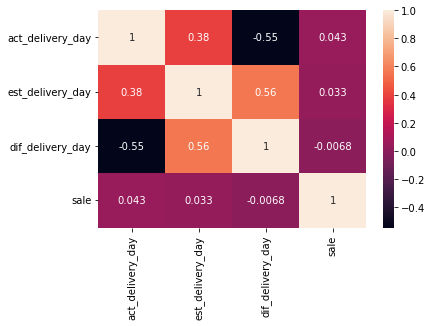

In [56]:
# add 2 columns which is actual and estimated delivery days (in unit of day)
# actual delivery days= order_delivered_customer_date - order_purchase_timestamp
# estimated delivery days= order_estimated_delivery_date - order_purchase_timestamp
a= olist_cleaned["order_purchase_timestamp"]
b= olist_cleaned["order_delivered_customer_date"]
c= olist_cleaned["order_estimated_delivery_date"]
olist_cleaned["act_delivery_day"]= (b-a).dt.days
olist_cleaned["est_delivery_day"]= (c-a).dt.days
olist_cleaned.head(3)

# Percentage of delivery before Estimated date
olist_cleaned["dif_delivery_day"]= olist_cleaned["est_delivery_day"]-olist_cleaned["act_delivery_day"]
print((olist_cleaned["dif_delivery_day"]>0).sum()/olist_cleaned.shape[0])

delivery_and_sale= olist_cleaned.loc[:, ["product_id","order_id", "act_delivery_day", "est_delivery_day",
                                         "dif_delivery_day","sale"]]
delivery_and_sale= delivery_and_sale.groupby("product_id").agg({"act_delivery_day":"mean","est_delivery_day":"mean",
                                             "dif_delivery_day":"mean","sale":"sum"})
print(delivery_and_sale.head(20))

sns.heatmap(delivery_and_sale.corr(), annot=True);

no significant relationship between delivery date and sale